Now it’s time to learn how to set, add, and remove categories from a Series. You’ll also explore how to update, rename, collapse, and reorder categories, before applying your new skills to clean and access other data within your DataFrame.

## Setting category variables

#### Setting categories
After exploring the pandas Series "size" from the adoptable dogs dataset, you have decided that it should be an ordinal categorical variable. Creating such a variable takes a few steps. If these steps are performed out of order, you may not be able to access or use the necessary methods. The goal is to convert the "size" column from the dogs dataset into a ordered categorical pandas Series with the following categories: ["small", "medium", "large"]

In [122]:
import pandas as pd
dogs = pd.read_csv('ShelterDogs.csv')
dogs

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,FEMALE,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,FEMALE,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,maybe,yes,yes,yes,NaN
2,23793,NaN,4.00,MALE,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,MALE,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,FEMALE,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,118,Fodri,16.92,male,Unknown Mix,12/25/03,12/25/03,3/22/06,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,8/27/04,8/27/04,7/8/05,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2934,4,Konrád,18.17,male,Unknown Mix,9/21/05,9/21/05,10/26/05,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2935,141,Kölni,17.17,male,Unknown Mix,11/27/04,11/27/04,5/2/05,black and brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
dogs['size'].dtype

dtype('O')

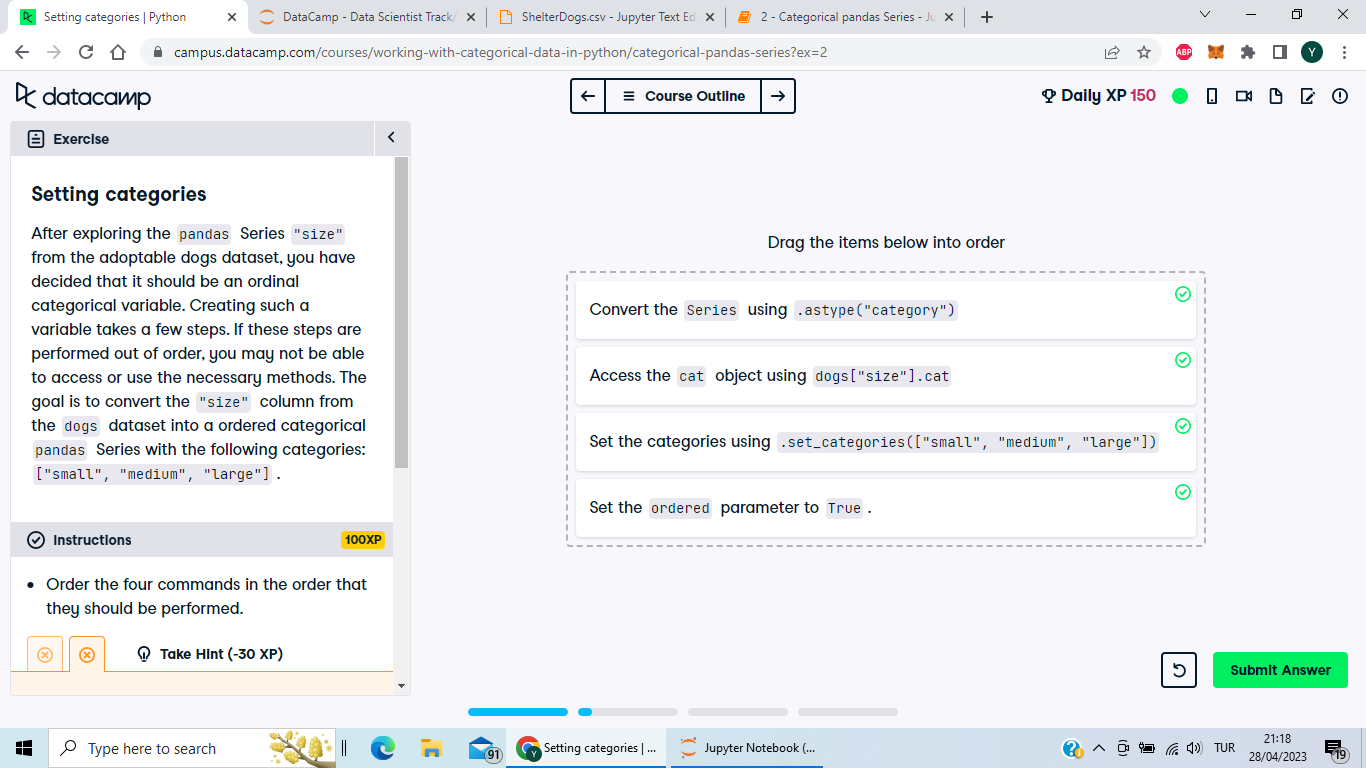

Great work. It might seem like several steps, but they all work together to best set up an ordered categorical column.

#### Adding categories
The owner of a local dog adoption agency has listings for almost 3,000 dogs. One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?". You are setting up a pipeline to do some analysis and want to look into what information is available regarding the "keep_in" variable. Both pandas, as pd, and the dogs dataset have been preloaded.

In [124]:
# Check frequency counts while also printing the NaN count
print(dogs["keep_in"].value_counts(dropna=False))
print("\n\n")

# Switch to a categorical variable
dogs["keep_in"] = dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64



both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Open Yard (Countryside)       0
Unknown History               0
Name: keep_in, dtype: int64


Well done. When the adoption agency starts adding more information to this column, they will need to use one of the five categories now available in the 'keep_in' variable.

#### Removing categories
Before adopting dogs, parents might want to know whether or not a new dog likes children. When looking at the adoptable dogs dataset, dogs, you notice that the frequency of responses for the categorical Series "likes_children" looks like this:
<br>
maybe     1718<br>
yes       1172<br>
no          47<br>
The owner of the data wants to convert all "maybe" responses to "no", as it would be unsafe to let a family adapt a dog if it doesn't like children. The code to convert all "maybe" to "no" is provided in Step 1. However, the option for "maybe" still remains as a category.

In [125]:
dogs['likes_children'].dtype

dtype('O')

In [126]:
dogs['likes_children'] = dogs['likes_children'].astype('category')
dogs['likes_children'].value_counts()

yes      1171
no         47
maybe       1
Name: likes_children, dtype: int64

In [127]:
# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Print out categories
print(dogs["likes_children"].cat.categories)
print("\n")

# Print the frequency table
print(dogs["likes_children"].value_counts())
print("\n")

# Remove the `"maybe" category
dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
print(dogs["likes_children"].value_counts())
print("\n")

# Print the categories one more time
print(dogs["likes_children"].cat.categories)

Index(['maybe', 'no', 'yes'], dtype='object')


yes      1171
no         48
maybe       0
Name: likes_children, dtype: int64


yes    1171
no       48
Name: likes_children, dtype: int64


Index(['no', 'yes'], dtype='object')


Great job. Telling parents that a dog 'maybe' likes children isn't helpful. To be on the safe side, the adoption agency has decided to remove maybe as an option. You can now do your analysis without worrying about 'Maybe?' showing up in the data.

## Updating categories

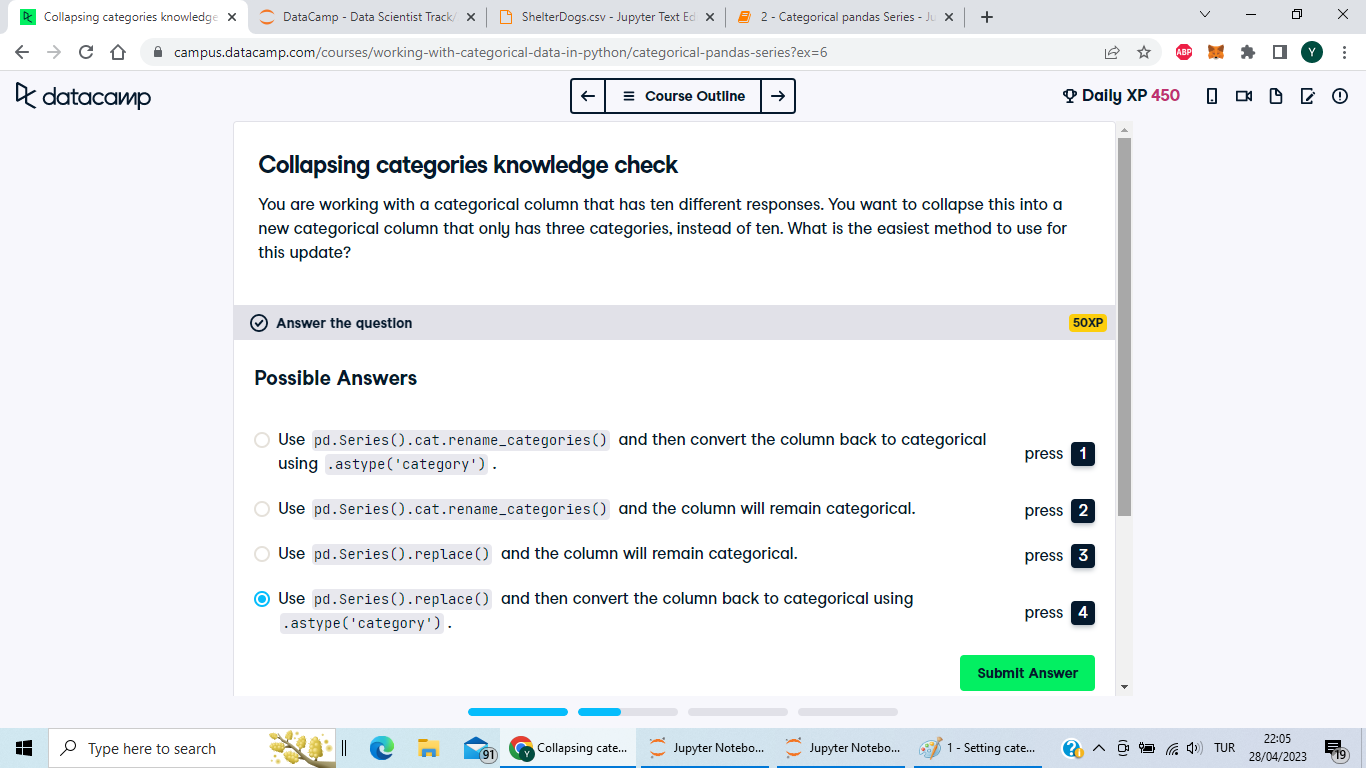

Great job! If you need to collapse categories, the .replace() method is quick and easy, but you will need to convert the column back to categorical.

#### Renaming categories
The likes_children column of the adoptable dogs dataset needs an update. Here are the current frequency counts:<br>
<br>
Maybe?    1718<br>
yes       1172<br>
no          47<br>
Two things that stick out are the differences in capitalization and the ? found in the Maybe? category. The data should be cleaner than this and you are being asked to make a few changes.

In [128]:
import pandas as pd
dogs2 = pd.read_csv('ShelterDogs-Copy1.csv')
dogs2

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,maybe?,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,118,Fodri,16.92,male,Unknown Mix,12/25/03,12/25/03,3/22/06,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,8/27/04,8/27/04,7/8/05,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2934,4,Konrád,18.17,male,Unknown Mix,9/21/05,9/21/05,10/26/05,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2935,141,Kölni,17.17,male,Unknown Mix,11/27/04,11/27/04,5/2/05,black and brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
dogs2.likes_children.value_counts()

yes       1169
no          47
maybe?       3
Name: likes_children, dtype: int64

In [130]:
dogs2.likes_children = dogs2.likes_children.astype('category')
dogs2.likes_children.dtype

CategoricalDtype(categories=['maybe?', 'no', 'yes'], ordered=False)

In [131]:
# Create the my_changes dictionary
my_changes = {'maybe?':'maybe'}

# Rename the categories listed in the my_changes dictionary
dogs2["likes_children"] = dogs2["likes_children"].cat.rename_categories(my_changes)

# Use a lambda function to convert all categories to uppercase using upper()
dogs2["likes_children"] =  dogs2["likes_children"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
print(dogs2["likes_children"].cat.categories)

Index(['MAYBE', 'NO', 'YES'], dtype='object')


Great work. Using two steps, we have completly updated the likes_children pandas Series. You can use these few steps to clean up categorical columns before performing your analysis.

#### Collapsing categories
One problem that users of a local dog adoption website have voiced is that there are too many options. As they look through the different types of dogs, they are getting lost in the overwhelming amount of choice. To simplify some of the data, you are going through each column and collapsing data if appropriate. To preserve the original data, you are going to make new updated columns in the dogs dataset. You will start with the coat column. The frequency table is listed here:<br>
<br>
short          1969<br>
medium          565<br>
wirehaired      220<br>
long            180<br>
medium-long       3

In [132]:
# Create the update_coats dictionary
update_coats = {'wirehaired':'medium',
                'medium-long':'medium'}

# Create a new column, coat_collapsed
dogs2["coat_collapsed"] = dogs2['coat'].replace(update_coats)

# Convert the column to categorical
dogs2["coat_collapsed"] = dogs2["coat_collapsed"].astype('category')

# Print the frequency table
print(dogs2["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


Great work. By collapsing four categories down to three, you have simplified your data. If you repeat this across several columns, the total combination of categories across these variables will be greatly reduced.

## Reordering categories

#### Reordering categories in a Series
The owner of a local dog adoption agency has asked you take a look at her data on adoptable dogs. She is specifically interested in the size of the dogs in her dataset and wants to know if there are differences in other variables, given a dog's size. The adoptable dogs dataset has been loaded as dogs and the "size" variable has already been saved as a categorical column.

In [133]:
dogs["size"] = dogs['size'].astype('category')

In [134]:
# Print out the current categories of the size variable
print(dogs["size"].cat.categories)
print("\n")

# Reorder the categories, specifying the Series is ordinal, and overwriting the original series
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)

# Print out the updated categories of the size variable
print(dogs["size"].cat.categories)

Index(['large', 'medium', 'small'], dtype='object')


Index(['small', 'medium', 'large'], dtype='object')


Great work. Small is smaller than medium, which is smaller than large. Now all of your analyses will be printed in the same order.

#### Using .groupby() after reordering
It is now time to run some analyses on the adoptable dogs dataset that is focused on the "size" of the dog. You have already developed some code to reorder the categories. In this exercise, you will develop two similar .groupby() statements to help better understand the effect of "size" on other variables. dogs has been preloaded for you.


In [135]:
# Previous code
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)

# How many Male/Female dogs are available of each size?
print(dogs.groupby("size")['sex'].value_counts())
print("\n\n")

# Do larger dogs need more room to roam?
print(dogs.groupby("size")["keep_in"].value_counts())

size    sex    
small   male        256
        female      207
         FEMALE       6
         MALE         4
        FEMALE        1
medium  male       1084
        female      852
         MALE         5
         FEMALE       2
        Malez         1
large   male        330
        female      187
         FEMALE       1
         MALE         1
Name: sex, dtype: int64



size    keep_in             
small   both flat and garden    238
        flat                     80
        garden                   21
medium  both flat and garden    795
        garden                  317
        flat                     97
large   both flat and garden    191
        garden                  172
        flat                      5
Name: keep_in, dtype: int64


Excellent! There are more medium male dogs than any other combination of size and sex. It also looks like larger dogs are more often kept outside, as opposed to a flat. Isn't it nice that each printout uses the order we specified earlier?

## Cleaning and accessing data

#### Cleaning variables
Users of an online entry system used to have the ability to freely type in responses to questions. This is causing issues when trying to analyze the adoptable dogs dataset, dogs. Here is the current frequency table of the "sex" column:<br>
<br>
male      1672<br>
female    1249<br>
 MALE        10<br>
 FEMALE       5<br>
Malez        1<br>
Now that the system only takes responses of "female" and "male", you want this variable to match the updated system.

In [136]:
dogs['sex'].value_counts()

male       1670
female     1246
 MALE        10
 FEMALE       9
FEMALE        1
Malez         1
Name: sex, dtype: int64

In [137]:
# Fix the misspelled word
replace_map = {"Malez": "male"}

# Update the sex column using the created map
dogs["sex"] = dogs["sex"].replace(replace_map)
print(dogs["sex"].value_counts())
print("\n")

# Strip away leading whitespace
dogs["sex"] = dogs["sex"].str.strip()
print(dogs["sex"].value_counts())
print("\n")

# Make all responses lowercase
dogs["sex"] = dogs["sex"].str.lower()
print(dogs["sex"].value_counts())
print("\n")

# Convert to a categorical Series
dogs["sex"] = dogs["sex"].astype('category')
print(dogs["sex"].value_counts())

male       1671
female     1246
 MALE        10
 FEMALE       9
FEMALE        1
Name: sex, dtype: int64


male      1671
female    1246
MALE        10
FEMALE      10
Name: sex, dtype: int64


male      1681
female    1256
Name: sex, dtype: int64


male      1681
female    1256
Name: sex, dtype: int64


Great job. Categorical variables are usually just strings with some additional properties. An easy way to update them is using .str. Just don't forget to convert the column back to a categorical Series!

#### Accessing and filtering data
You are working on a Python application to display information about the dogs available for adoption at your local animal shelter. Some of the variables of interest, such as "breed", "size", and "coat", are saved as categorical variables. In order for this application to work properly, you need to be able to access and filter data using these columns.

The ID variable has been set as the index of the pandas DataFrame dogs.

In [138]:
dogs = dogs.set_index('ID')
dogs

,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
ID,,,,,,,,,,,,,,,,,,
23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,no,yes,yes,yes,NaN
23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Fodri,16.92,male,Unknown Mix,12/25/03,12/25/03,3/22/06,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden
262,Csibi,17.33,female,Staffordshire Terrier Mix,8/27/04,8/27/04,7/8/05,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Konrád,18.17,male,Unknown Mix,9/21/05,9/21/05,10/26/05,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Print the category of the coat for ID 23807
print(dogs.loc[23807, "coat"])

short


In [141]:
# Find the count of male and female dogs who have a "long" coat
print(dogs.loc[dogs["coat"]=="long", "sex"].value_counts())

male      124
female     56
Name: sex, dtype: int64


In [142]:
# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs['breed']=="English Cocker Spaniel", "age"].mean())

8.186153846153847


In [143]:
# Count the number of dogs that have "English" in their breed name
print(dogs[dogs["breed"].str.contains("English", regex=False)].shape[0])

35


Well done! There are currently 24 dogs up for adoption with "English" in their breed name. Being able to access values and filter data in a DataFrame is an important skill that will be needed almost anytime pandas is used.